In [38]:
import numpy as np
import matplotlib.pyplot as plt

# FFT functions and interpolation
import nfft
from numpy import fft
from scipy.interpolate import interp1d
import scipy.signal as sig

# Relative error function
relerr = lambda y, ys : np.abs((y-ys)/y)

In [94]:
#### Normal domain
N_samples = 1000
signal_length = 8*np.pi
f = lambda x : np.sum(np.sin(i*x)/(2*i+1) for i in range(8))
# f = lambda x : sig.square(x)

# Uniform sampling
x = np.linspace(0, signal_length, N_samples)
y = f(x)

# Non-uniform sampling (up to 5% off)
perturb = 1 + .05*(1-2*np.random.random(N_samples))
xn = np.sort(x * perturb)
xn[0] = x[0]  #Align domains
xn[-1]= x[-1] 
yn = f(xn)

# Uniform spline interpolation of non-uniform sample
splerp = interp1d(xn, yn, kind = 'cubic')
yi = splerp(x)


In [95]:
# Fourier domain


# Frequencies
time_step = signal_length / N_samples
freqs = np.fft.fftfreq(y.size, time_step)

# Fourier transform 
y_hat = fft.fft(y) # Uniform
yn_hat = nfft.nfft(xn, yn) # Non-uniform
yi_hat = fft.fft(y) # Uniformly interpolated from non-unif

# power spectra
ps = np.abs(y_hat)**2
psn = np.abs(yn_hat)**2
psi = np.abs(yi_hat)**2

ps = ps[freqs > 0]
psn = psn[freqs > 0]
psi = psi[freqs > 0]



# Only positive frequencies
freqs = freqs[freqs>0]


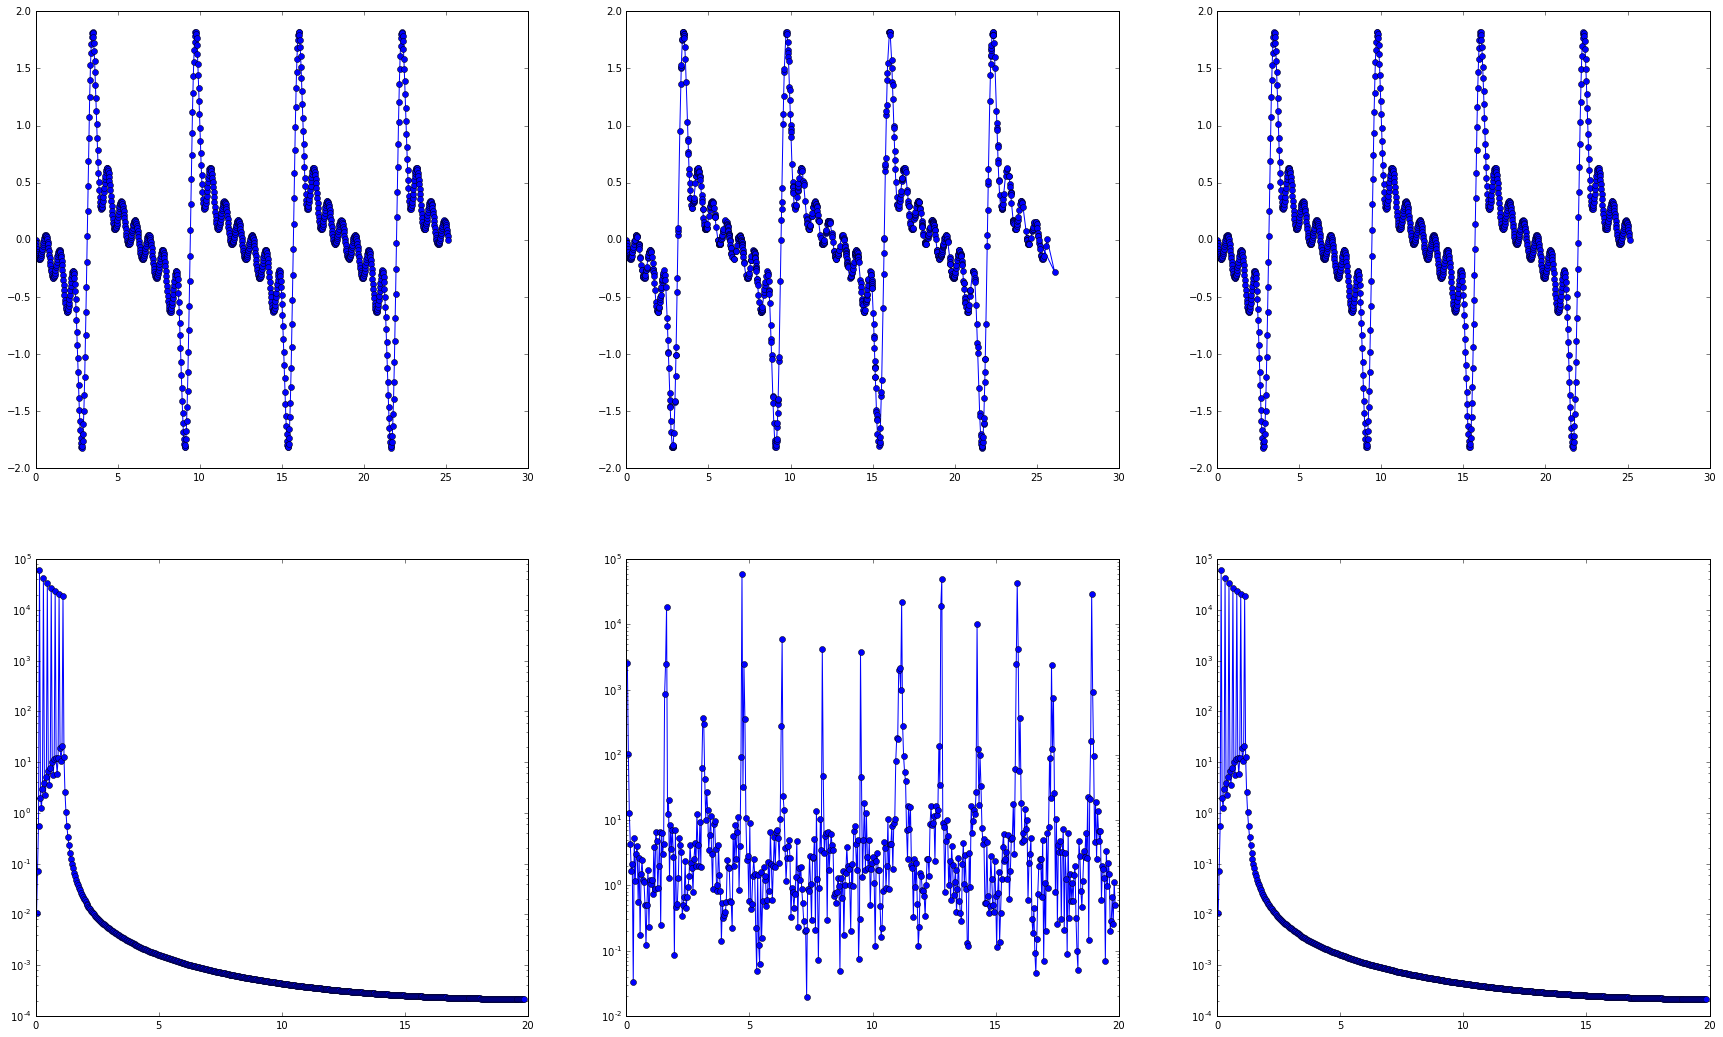

In [89]:
# Plotting fourier results

f, axs = plt.subplots(2,3)
f.set_figwidth(30)
f.set_figheight(18)

# Normal domain
axs[0,0].plot(x , y , '-o') #Uniform
axs[0,1].plot(xn, yn, '-o') #Non-uniform
axs[0,2].plot(x , yi, '-o') #Uniformly interpolated from non-unif

# axs[0,2].semilogy(x, relerr(y,yi))

#Fourier domain
axs[1,0].semilogy(freqs, ps, '-o')
axs[1,1].semilogy(freqs, psn, '-o')
axs[1,2].semilogy(freqs, psi, '-o')
# axs[1,2].semilogy(relerr(y_hat.real,yi_hat.real))

# plt.show()



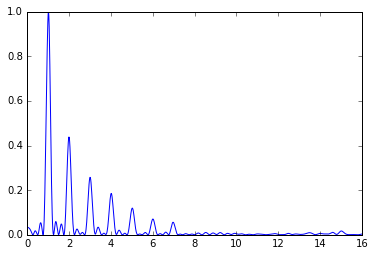

In [93]:
# Lomb-scargle power spectrum: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lombscargle.html

# Succes!

f =  np.linspace(0.01, 16, N_samples)

ls = sig.lombscargle(xn, yn, f)

plt.plot(f, ls/np.max(ls))
# plt.plot(freqs, ps/np.max(ps))


